## Law School Admissions Reddit Sentiment Analysis

Code to perform sentiment analysis on every post and comment on r/lawschooladmissions.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from textblob import TextBlob
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### Import reddit data

In [2]:
df_reddit = pd.read_csv(r'C:\Users\Jenny\reddit\reddit_cleaned.csv', dtype={'title':'str', 'body':'str', 'type':'str', 'score':'float', 'permalink':'str'})
df_reddit.head(1)

### Analyze text for sentiment, words, phrases

In [3]:
# Convert the body of each post and comment to a TextBlob object
df_reddit['textblob'] = df_reddit['body'].apply(lambda x: TextBlob(str(x)))

In [4]:
# Run TextBlob's sentiment analysis which analyzes the contents of the text body and returns a tuple with a polarity and subjectivity score.
# The polarity score is a float within the range [-1.0, 1.0].
# The subjectivity score is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

df_reddit['sentiment'] = df_reddit['textblob'].apply(lambda x: x.sentiment)
df_reddit['sentiment_polarity'] = df_reddit['sentiment'].apply(lambda x: x[0])
df_reddit['sentiment_subjectivity'] = df_reddit['sentiment'].apply(lambda x: x[1])

In [11]:
# Noun phrases and word extraction, if interested
df_reddit['phrases'] = df_reddit['textblob'].apply(lambda x: x.noun_phrases)
df_reddit['words'] = df_reddit['textblob'].apply(lambda x: x.words)

In [12]:
# Format df_reddit columns
df_reddit = df_reddit.drop(['sentiment'], axis=1)
df_reddit = df_reddit[['time_created', 'title', 'body', 'type', 'sentiment_polarity', 'sentiment_subjectivity','score', 'post_id', 'comment_id', 'author', 'permalink', 'words', 'phrases', 'textblob']]

In [13]:
# Save to CSV because TextBlob can take a long time to run
df_reddit.to_csv('reddit_sentiment.csv')

In [2]:
# Read CSV if starting work from here
df_reddit = pd.read_csv(r'C:\Users\Jenny\reddit\reddit_sentiment.csv', dtype={'title':'str', 'body':'str', 'type':'str', 'score':'float', 'permalink':'str'}, index_col=0)

,time_created,title,body,type,sentiment_polarity,sentiment_subjectivity,score,post_id,comment_id,author,permalink,words,phrases,textblob
0,2018-09-05 03:10:23,Cornell Hidden Fee Waiver,"I had added some schools to ""my list"" on LSAC but hadn't actually started the application until today. Reminder to click on ""start application"" to see if you have a fee waiver. Fingers crossed!",post,0.000000,0.100000,1.0,9d2i59,NaN,vanillalattefoam,/r/lawschooladmissions/comments/9d2i59/cornell_hidden_fee_waiver/,"['I', 'had', 'added', 'some', 'schools', 'to', 'my', 'list', 'on', 'LSAC', 'but', 'had', ""n't"", 'actually', 'started', 'the', 'application', 'until', 'today', 'Reminder', 'to', 'click', 'on', 'start', 'application', 'to', 'see', 'if', 'you', 'have', 'a', 'fee', 'waiver', 'Fingers', 'crossed']","['lsac', 'reminder', 'fee waiver', 'fingers']","I had added some schools to ""my list"" on LSAC but hadn't actually started the application until today. Reminder to click on ""start application"" to see if you have a fee waiver. Fingers crossed!"
1,2018-09-05 02:47:30,Where do I check LSAC GPA on LSAC?,"Hello,Just received news from LSAC that my transcripts were received; now, how do I check my LSAC-converted GPA on LSAC? Would I need to purchase CAS first in order to see my LSAC GPA?Thank you.",post,0.250000,0.333333,1.0,9d2bke,NaN,Zero1868,/r/lawschooladmissions/comments/9d2bke/where_do_i_check_lsac_gpa_on_lsac/,"['Hello', 'Just', 'received', 'news', 'from', 'LSAC', 'that', 'my', 'transcripts', 'were', 'received', 'now', 'how', 'do', 'I', 'check', 'my', 'LSAC-converted', 'GPA', 'on', 'LSAC', 'Would', 'I', 'need', 'to', 'purchase', 'CAS', 'first', 'in', 'order', 'to', 'see', 'my', 'LSAC', 'GPA', 'Thank', 'you']","['hello', 'lsac', 'lsac-converted gpa', 'lsac', 'cas', 'lsac gpa', 'thank']","Hello,Just received news from LSAC that my transcripts were received; now, how do I check my LSAC-converted GPA on LSAC? Would I need to purchase CAS first in order to see my LSAC GPA?Thank you."
2,2018-09-05 02:30:47,Apply now or wait?,"I'm taking the LSAT again Saturday. Hoping to boost my score from June (162). Should I wait to apply until after the new scores post, or should I apply now and just trust that a decision won't be made until after the new scores are posted.",post,0.136364,0.454545,1.0,9d270h,NaN,bjokay,/r/lawschooladmissions/comments/9d270h/apply_now_or_wait/,"['I', ""'m"", 'taking', 'the', 'LSAT', 'again', 'Saturday', 'Hoping', 'to', 'boost', 'my', 'score', 'from', 'June', '162', 'Should', 'I', 'wait', 'to', 'apply', 'until', 'after', 'the', 'new', 'scores', 'post', 'or', 'should', 'I', 'apply', 'now', 'and', 'just', 'trust', 'that', 'a', 'decision', 'wo', ""n't"", 'be', 'made', 'until', 'after', 'the', 'new', 'scores', 'are', 'posted']","['lsat', 'hoping', 'june', 'new scores post', 'just trust', ""decision wo n't"", 'new scores']","I'm taking the LSAT again Saturday. Hoping to boost my score from June (162). Should I wait to apply until after the new scores post, or should I apply now and just trust that a decision won't be made until after the new scores are posted."
3,2018-09-05 02:28:39,How to integrate my part time cashier/waitressing jobs into my resume,"I’m including the service jobs, but i’m still struggling to integrate them without detracting from my more relevant full time WE. I graduated in 2017, so I really do want to highlight the fact that I’ve been working full time. but when everything’s in chronological order, it just doesn’t look right? my service job is technically the most recent “X - Present,” so it’s the first thing listed. any suggestions?",post,0.236310,0.368254,1.0,9d26ho,NaN,diamondlaw21,/r/lawschooladmissions/comments/9d26ho/how_to_integrate_my_part_time_cashierwaitressing/,"['I', '’', 'm', 'including', 'the', 'service', 'jobs', 'but', 'i', '’', 'm', 'still', 'struggling', 'to', 'integrate', 'them', 'without', 'detracting', 'from', 'my', 'more', 'relevant', 'full', 'time', 'WE', 'I', 'graduated', 'in', '20

### What is the distribution of sentiment in this subreddit?

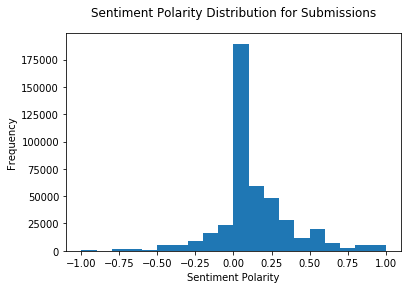

In [127]:
# Distribution of 'sentiment_polarity'
df_reddit.hist(column='sentiment_polarity', bins=20, grid=False)
plt.title('Sentiment Polarity Distribution for Submissions', y=1.05)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.savefig('reddit_sentiment_hist.png', dpi=150, bbox_inches = "tight")

### Which submissions are positive vs negative?

In [103]:
# Filter by sentiment_polarity to identify thresholds for postive and negative posts & comments
df_reddit.loc[df_reddit['sentiment_polarity'] > 0.4]

,time_created,title,body,type,sentiment_polarity,sentiment_subjectivity,score,post_id,comment_id,author,permalink,words,phrases,textblob,sentiment_group,date_created,month_created
12,2018-09-05 00:01:43,Is your resume chronological or ordered by relevance?,Title says it :),post,0.500000,1.000000,1.0,9d13kg,NaN,helloitsmehhh,/r/lawschooladmissions/comments/9d13kg/is_your_resume_chronological_or_ordered_by/,"['Title', 'says', 'it']",['title'],Title says it :),neutral,2018-09-05,2018-09
27,2018-09-04 19:47:00,Texas Resident Fee Waiver but not a Texan,"Lol. UT just sent me a fee waiver that starts with ""greetings from a fellow Texan"" but I'm not from Texas...",post,0.800000,0.700000,1.0,9cz1e4,NaN,Fallingworld,/r/lawschooladmissions/comments/9cz1e4/texas_resident_fee_waiver_but_not_a_texan/,"['Lol', 'UT', 'just', 'sent', 'me', 'a', 'fee', 'waiver', 'that', 'starts', 'with', 'greetings', 'from', 'a', 'fellow', 'Texan', 'but', 'I', ""'m"", 'not', 'from', 'Texas']","['lol', 'ut', 'fee waiver', 'texan', 'texas']","Lol. UT just sent me a fee waiver that starts with ""greetings from a fellow Texan"" but I'm not from Texas...",positive,2018-09-04,2018-09
40,2018-09-04 17:53:28,PS/Resume/Why X Titles,"Did you guys put your name, a title, and/or anything else at the top of your essays?",post,0.500000,0.500000,1.0,9cy1ox,NaN,judgejudy198,/r/lawschooladmissions/comments/9cy1ox/psresumewhy_x_titles/,"['Did', 'you', 'guys', 'put', 'your', 'name', 'a', 'title', 'and/or', 'anything', 'else', 'at', 'the', 'top', 'of', 'your', 'essays']",[],"Did you guys put your name, a title, and/or anything else at the top of your essays?",neutral,2018-09-04,2018-09
52,2018-09-04 15:40:11,"Columbia Law App - ""Fun Facts""","It's an optional section on the application. I have fun hobbies but don't feel like they're impressive or memorable enough to put on my app. Are you all completing this section? If so, what are you writing about? If not, why not?",post,0.450000,0.675000,1.0,9cwr6w,NaN,exjourno,/r/lawschooladmissions/comments/9cwr6w/columbia_law_app_fun_facts/,"['It', ""'s"", 'an', 'optional', 'section', 'on', 'the', 'application', 'I', 'have', 'fun', 'hobbies', 'but', 'do', ""n't"", 'feel', 'like', 'they', ""'re"", 'impressive', 'or', 'memorable', 'enough', 'to', 'put', 'on', 'my', 'app', 'Are', 'you', 'all', 'completing', 'this', 'section', 'If', 'so', 'what', 'are', 'you', 'writing', 'about', 'If', 'not', 'why', 'not']","['optional section', 'fun hobbies']","It's an optional section on the application. I have fun hobbies but don't feel like they're impressive or memorable enough to put on my app. Are you all completing this section? If so, what are you writing about? If not, why not?",neutral,2018-09-04,2018-09
55,2018-09-04 15:22:45,Questions to ask on a visit,Thought I’d start a thread on important questions to ask your admissions/tour guide of the law school.Feel free to post them!,post,0.450000,0.900000,1.0,9cwlht,NaN,JDoe1993tx,/r/lawschooladmissions/comments/9cwlht/questions_to_ask_on_a_visit/,"['Thought', 'I', '’', 'd', 'start', 'a', 'thread', 'on', 'important', 'questions', 'to', 'ask', 'your', 'admissions/tour', 'guide', 'of', 'the', 'law', 'school.Feel', 'free', 'to', 'post', 'them']","['thought', '’ d', 'important questions', 'law school.feel']",Thought I’d start a thread on important questions to ask your admissions/tour guide of the law school.Feel free to post them!,neutral,2018-09-04,2018-09
179,2018-09-01 03:05:29,a pep talk!,"if you're like me you're probably overthinking a thousand things about your application right now and you've turned to reddit, which may have added to the overthinking.this is your reminder that you can do it! you will submit your applications on time! your personal statement will be great! you will crush your retake! your LORs will be glowing! you are worthy of law school! go kick ass on applications, y'all",post,0.465774,0.646429,1.0,9bzuz2,NaN,taco_elle,/r/lawschooladmissions/comments/9bzuz2/a_pep_talk/,"['if', '

In [3]:
# Categorize posts & comments into sentiment_group (postive, negative, neutral) based on sentiment_polarity
df_reddit['sentiment_group'] = df_reddit['sentiment_polarity'].apply(lambda x: 'positive' if x > 0.5 else 'negative' if x < -0.1 else 'neutral')

In [133]:
# Top 10 most positive and most negative submissions
top_positive = df_reddit.sort_values('sentiment_polarity', ascending=False).reset_index(drop=True).head(10)
top_negative = df_reddit.sort_values('sentiment_polarity', ascending=True).reset_index(drop=True).head(10)

In [135]:
top_negative[['sentiment_polarity','body']]

,sentiment_polarity,body
0,-1.0,Parking in Charlottesville is awful so be prepared to pay
1,-1.0,Might want to read this thread about how horrible USF specifically is
2,-1.0,That's just nasty of them. I've put in a call to my pal Bob Mueller and he said he'd take a look at this.
3,-1.0,holy crap congrats!!
4,-1.0,CONGRAAAAATSSSS and I am terrible but could you pm stats?
5,-1.0,Harvard. I've heard that Chicago is just miserable.
6,-1.0,"Unless there's a possibility of taking classes to finish your degree over the summer, suck it up. Not the worst."
7,-1.0,Terrifying
8,-1.0,"Wait, why does this sub think Gorsuch** is as awful? I’m not in the loop."
9,-1.0,I’ve been wondering this. I have a visit scheduled tomorrow. My worst nightmare is getting rejected WHILE I’m there. 😂😂😭


### How has sentiment changed over time?

In [51]:
# Calculate the number of postive and negative submissions by month
df_reddit['month_created'] = df_reddit['time_created'].apply(lambda x: pd.to_datetime(x).to_period('M'))
grouped_sentiment_month = df_reddit.groupby(['month_created', 'sentiment_group'])['sentiment_group'].count()
df_sentiment_month = grouped_sentiment_month.unstack().fillna(0)
df_sentiment_month.reset_index(level=0, inplace=True)

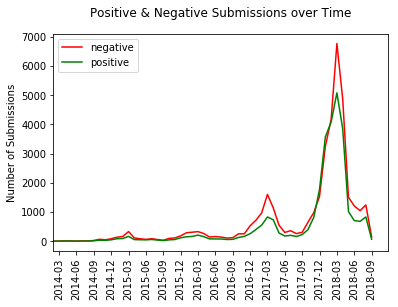

In [125]:
# Plot df_sentiment_month for positive and negative submissions by month
x = np.arange(0,len(df_sentiment_month['month_created']),1)
neg = df_sentiment_month['negative']
pos = df_sentiment_month['positive']
plt.plot(x, neg, 'r')
plt.plot(x, pos, 'g')
ax = plt.gca()
x_ticks = x[0::3]
x_ticks_label = df_sentiment_month['month_created'][0::3]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_label, rotation=90)
#ax.set_ylim(0,30)
ax.set_xlim(2, None)
plt.title('Positive & Negative Submissions over Time', y=1.05)
plt.ylabel('Number of Submissions')
plt.legend()
plt.savefig('reddit_sentiment_count.png', dpi=150, bbox_inches = "tight")

In [109]:
# Volume-weighted analysis of positive and negative submissions over time (% positive and % negative)
df_sentiment_month['total'] = df_sentiment_month.loc[:, 'negative':'positive'].sum(axis=1)
df_sentiment_month['%_positive'] = round(df_sentiment_month['positive']/df_sentiment_month['total'], 2)*100
df_sentiment_month['%_negative'] = round(df_sentiment_month['negative']/df_sentiment_month['total'], 2)*100
df_sentiment_month['difference'] = df_sentiment_month['%_negative'] - df_sentiment_month['%_positive']

In [111]:
df_sentiment_month['difference'].mean()

3.1206896551724137

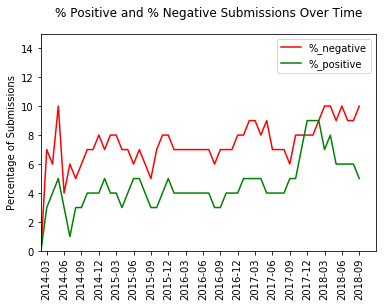

In [126]:
# Plot df_sentiment_month for % positive and % negative submissions by month
x = np.arange(0,len(df_sentiment_month['month_created']),1)
neg = df_sentiment_month['%_negative']
pos = df_sentiment_month['%_positive']
plt.plot(x, neg, 'r')
plt.plot(x, pos, 'g')
ax = plt.gca()
x_ticks = x[0::3]
x_ticks_label = df_sentiment_month['month_created'][0::3]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_label, rotation=90)
ax.set_ylim(0,15)
ax.set_xlim(2, None)
plt.title('% Positive and % Negative Submissions Over Time', y=1.05)
plt.ylabel('Percentage of Submissions')
plt.legend()
plt.savefig('reddit_sentiment_percentage.png', dpi=150, bbox_inches = "tight")

In [136]:
df_reddit.shape

(441687, 17)